In [179]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [362]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [181]:
#Iris data 
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [182]:
data = data[['PetalLengthCm', 'PetalWidthCm', 'Species']]

In [183]:
data.head(5)

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [184]:
print(data.shape)

(150, 3)


In [185]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

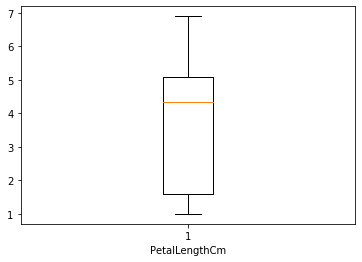

In [186]:
#Boite à moustache de PetalLengthCm
plt.boxplot(data['PetalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.show()

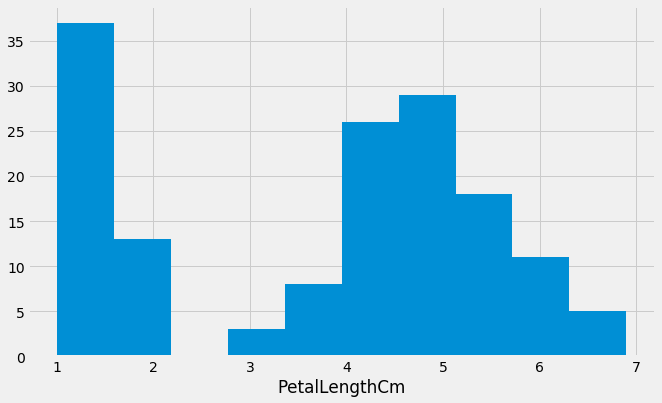

In [363]:
#Distribution de PetalLengthCm
plt.hist(data['PetalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.show()

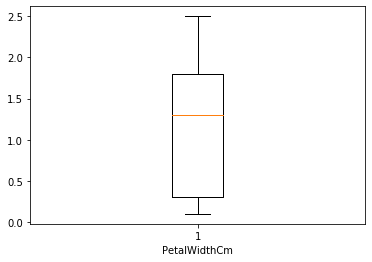

In [359]:
#Boite à moustache de PetalWidthCm
plt.boxplot(data['PetalWidthCm'])
plt.xlabel('PetalWidthCm')
plt.show()

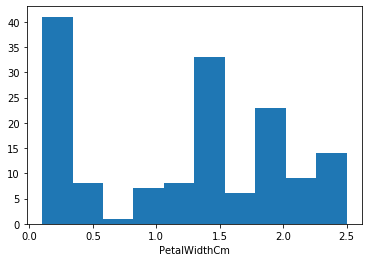

In [189]:
#Distribution de PetalWidthCm
plt.hist(data['PetalWidthCm'])
plt.xlabel('PetalWidthCm')
plt.show()

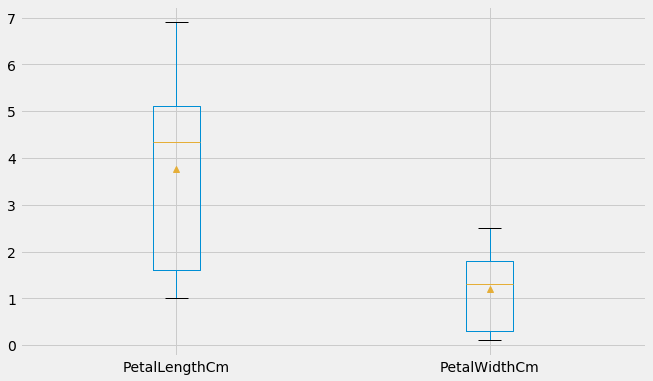

In [365]:
#Boite à moustache de PetalWidthCm

boxplot = data.boxplot(column=['PetalLengthCm', 'PetalWidthCm'],showmeans=True)
boxplot

No handles with labels found to put in legend.


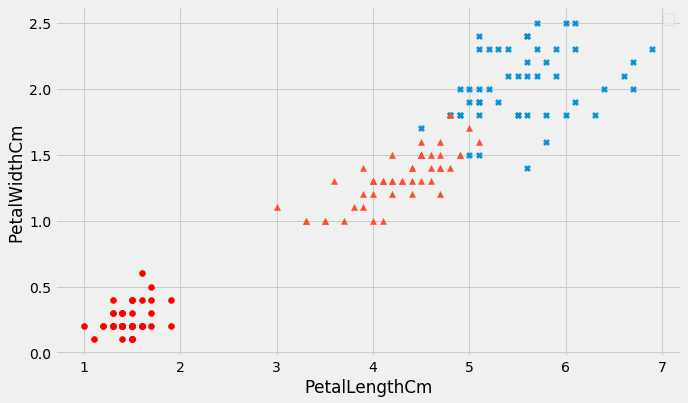

In [391]:
target_setosa = data[data.Species == 'Iris-setosa']
plt.scatter(target_setosa['PetalLengthCm'], target_setosa['PetalWidthCm'],color='red')

target_virginica = data[data.Species == 'Iris-virginica']
plt.scatter(target_virginica['PetalLengthCm'], target_virginica['PetalWidthCm'],marker = 'X')

target_versicolor = data[data.Species == 'Iris-versicolor']
plt.scatter(target_versicolor['PetalLengthCm'], target_versicolor['PetalWidthCm'],marker = '^')

plt.legend()
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.show()

In [392]:
#Data aleatoire pour diviser
data = data.sample (frac = 1, random_state = 42)

In [393]:
#Division de données ( train - test)
from sklearn.model_selection import train_test_split
data_test,data_train = train_test_split(data, test_size = 0.8)

In [394]:
print( data_test.shape)

(30, 3)


No handles with labels found to put in legend.


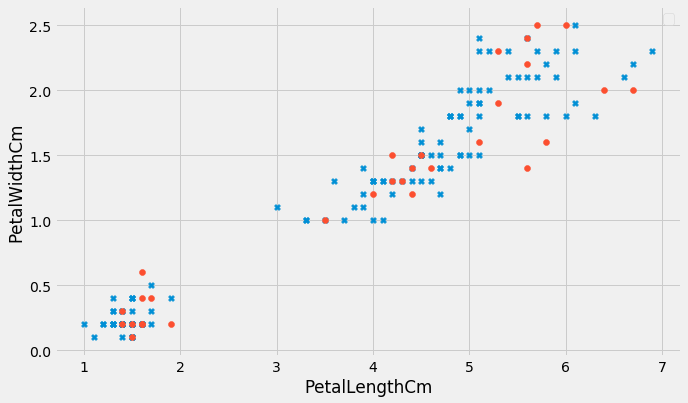

In [395]:
plt.scatter(data_train['PetalLengthCm'], data_train['PetalWidthCm'],marker = 'X')
plt.scatter(data_test['PetalLengthCm'], data_test['PetalWidthCm'],marker = 'o')
plt.legend()
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()


In [396]:
x_train = data_train[['PetalLengthCm','PetalWidthCm']]
y_train = data_train['Species']

x_test = data_test[['PetalLengthCm','PetalWidthCm']]
y_test = data_test['Species']

In [397]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [398]:
logisticRegression.coef_

array([[-2.57106387, -1.10113456],
       [ 0.14175602, -0.90651919],
       [ 2.42930785,  2.00765375]])

In [399]:
logisticRegression.intercept_

array([ 10.29342586,   2.82678583, -13.12021169])

In [400]:
theta_0 = logisticRegression.intercept_[0]
theta_1 = logisticRegression.coef_[0, 0]
theta_2 = logisticRegression.coef_[0, 1]

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

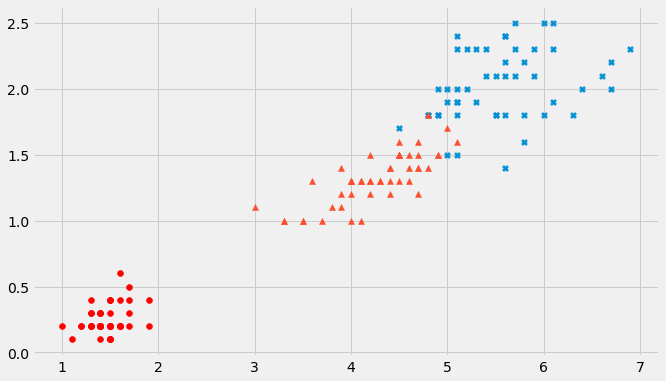

In [402]:
#Decision boundary ( bach n9sem les 3 classes mabghach ysde9 hit kaynin 3 classes )

def decision_boundary(theta_0, theta_1, theta_2, theta_3, l_x):
    return (1 / theta_3 * (-theta_0 - theta_1 - theta_3, l_x))

target_setosa = data[data.Species == 'Iris-setosa']
plt.scatter(target_setosa['PetalLengthCm'], target_setosa['PetalWidthCm'],color='red')

target_virginica = data[data.Species == 'Iris-virginica']
plt.scatter(target_virginica['PetalLengthCm'], target_virginica['PetalWidthCm'],marker = 'X')


target_versicolor = data[data.Species == 'Iris-versicolor']
plt.scatter(target_versicolor['PetalLengthCm'], target_versicolor['PetalWidthCm'],marker = '^')

l_x = np.linspace(1,5)
l_y = decision_boundary (theta_0, theta_1, theta_2,theta_3, l_x)
plt.plot(l_x, l_y, label = 'decision boundary')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show() 

### Model evaluation

In [265]:
y_pred = logisticRegression.predict(x_test)

In [299]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
cm =  confusion_matrix(y_true = y_test, y_pred = y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

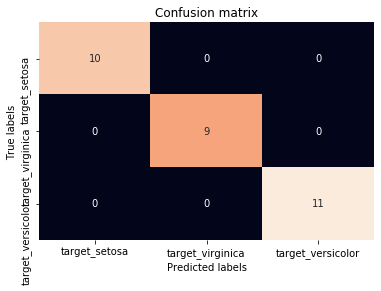

In [300]:
matrix = plt.subplot()
sns.heatmap(cm, annot = True, ax = matrix , cbar = False)

matrix.set_xlabel('Predicted labels')
matrix.set_ylabel('True labels')
matrix.set_title('Confusion matrix')
matrix.xaxis.set_ticklabels(['target_setosa','target_virginica','target_versicolor'])
matrix.yaxis.set_ticklabels(['target_setosa','target_virginica','target_versicolor'])
plt.show() 


In [301]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = y_pred
target_names = ['target_setosa', 'target_virginica', 'target_versicolor']
print(classification_report(y_true, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

    target_setosa       1.00      1.00      1.00        10
 target_virginica       1.00      1.00      1.00         9
target_versicolor       1.00      1.00      1.00        11

         accuracy                           1.00        30
        macro avg       1.00      1.00      1.00        30
     weighted avg       1.00      1.00      1.00        30



In [354]:
y_pred
pred = pd.DataFrame(y_pred,columns=['class'])
test =  test.reset_index(drop=True)
pd.concat([test, pred], axis=1,ignore_index = True)

,0,1
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-virginica,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-versicolor,Iris-versicolor
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica
